<a href="https://colab.research.google.com/github/kristybell/TensorFlow_Developer_Certificate/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

Ther are many definitions for a regression problem, but let's simplify it: predicting a numerical variable absed on some other combination of variable...aka predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.7.0


## Creating Data to View and Fit

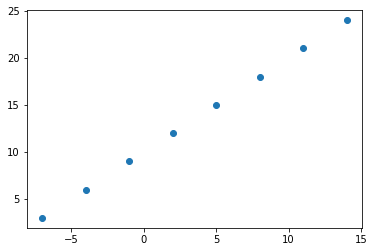

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features (Inependent Variable)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels (Dependent Variables)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize It
plt.scatter(X, y);

In [3]:
# Check the relationship between Y and y
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Inputs and Output Shapes

In [4]:
# Create a demo tensor for the housing price prediction problem
house_info = tf.constant(["bedroom ", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom ', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X[0].ndim

0

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
# Turn NumPy arrays into tensors
X = tf.constant(X)
y =tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

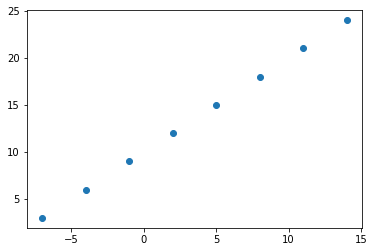

In [11]:
plt.scatter(X,y);

## Steps in Modelling in TensorFlow

1. **Creating a Model** - define the input and output layers, as well as, the hidden layers of a deep learning model.
2. **Compiling a Model** - define the loss function (the function which tells the model how wrong it is), the optimizer (tells the model how to improve the patterns its learning), and evaluation metrics (what can be used to interpret the performance of the model).
3. **Fitting a Model** - letting the model try to find patterns between X and y (features and labels, respectively).

In [12]:
# Set random seed
tf.random.set_seed(42)    # allows for reproducibility

# 1. Create a model using the Sequential API (groups linear)
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,              # mae --> mean absolute error (comparison of predicted vs observed)
              optimizer = tf.keras.optimizers.SGD(),     # SGD --> stochastic gradient descent 
              metrics = ["mae"]
            )    

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)     # epochs --> training iterations

Epoch 1/5
1/1 [==============================] - 1s 544ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


## Definitions:
* **loss** --> how wrong the model's predictions are compared to the truth labels (objective is to minimize this metric.
* **optimizer** --> how the model should update its internal patterns to better its predictions.
* **mae** --> Mean Absolute Error; human interpretable values for how well the model is doing (evaluation metric)
* **epochs** --> how many times the model will go through all of the training examples

In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [15]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving the Model

Can improve the model by altering the steps taken to create the model.

1. **Creating a Model** 
  * add more layers
  * increase the number of hidden units (aka neurons) within each of the hidden layers
  * change the activation of each layers

2.  **Compiling the Model**
  * change the optimization function or the learning rate of optimization function


3.  **Fitting the Model** 
  * fit a model with more **epochs** (allow it to train longer) or on more data (give the model more examples to learn from)

In [16]:
# Rebuild the model

# 1. Create the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model (this time train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 323ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [17]:
# Reminder of the date
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
# See if the model's prediction has improved
model.predict([17.0])       # we need it to be 17.0 + 10 = 27.0 for 100% accuracy

array([[29.739855]], dtype=float32)

In [19]:
# See if another change can be made to improve the model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation="relu"),    # the change; added an extra hidden layer
        tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 365ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 7ms/st

In [20]:
# Reminder of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [21]:
# Try to make a prediction
model.predict([17.0])         # should be 17.0 + 10 = 27

array([[31.223137]], dtype=float32)

In [22]:
# Model is overfitting! Training is better, but low predictive performance

In [23]:
# See if another change can be made to improve the model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units and using optimizer Adam and higher learning rate)
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation="relu"),    # the first change; added an extra hidden layer
        tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.01),    # the second and third changee; using Adam instead of SGD with higher learning rate by magnitude of 10
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 416ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9052 - mae: 11.9052
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0712 - mae: 11.0712
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2556 - mae: 10.2556
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6071 - mae: 9.6071
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.9779 - mae: 8.9779
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.3324 - mae: 8.3324
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.6675 - mae: 7.6675
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 6.9773 - mae: 6.9773
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.2578 - mae: 6.2578
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - l

In [24]:
# Try to make a prediction
model.predict([17.0])         # should be 17.0 + 10 = 27

array([[26.43606]], dtype=float32)

#### **Sidenote:** The learning parameter `lr` is the most important hyperparameter of Neural Networks.

## Evaluating a Model

In practice, a typical workflow one will go through when  building neural networks is:

```
Build a model -> Fit it -> Evaluate It -> Tweak the Model -> Fit It -> Evaluate It-> Tweak the Model -> Fit It -> Evaluate It...
```

When it comes to evaluation...3 works to memorize:

>"Visualize, visualize, visualize"


It is a good idea to visualize:
* The data -> what is the data? what does it look like?
* The model -> what does the model look like?
* The training of a model -> how does the model perform while it learns?
* The predictions of the model -> how do the predictions of the model line up against the ground truth (the original labels)

In [25]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)   # dtype will be integers and not floats
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [26]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

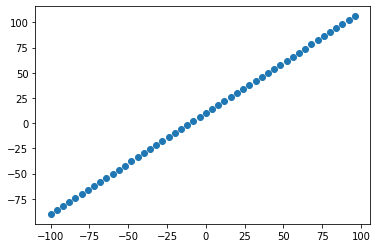

In [27]:
# Visualize the data
import matplotlib.pyplot as ply

plt.scatter(X, y);

### The 3 sets...

* **Training Set** - the model learns from this data, which is typically 70-80% of the total data available. (i.e. course materials)
* **Validation Set** - the model gets tuned on this data, which is typically 10-15% of the data available. (i.e. practice exam)
* **Test Set** - the model gets evaluated on this data to test what it has learned, this set  is typically 10-15% of the total data available. (i.e. final exam)

In [28]:
# Check the length (how many samples) in the data set
len(X)

50

In [29]:
# Split the data into training and test sets
X_train = X[:40]   # first 40 are training samples (80% of the data)
y_train = y[:40]   

X_test = X[40:]     # the last 10 are testing sample (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now that the data is in training and test data sets...time to visualize it again!

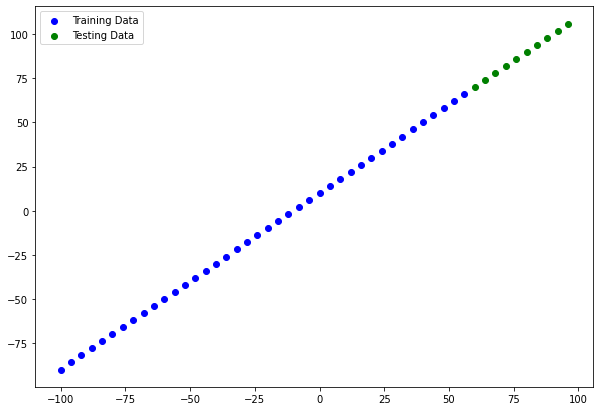

In [30]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training Data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label = "Testing Data")

# Show a legend
plt.legend();

In [31]:
# How to build a Neural Network for this data

# 1. Create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

## Visualizing the Model

In [32]:
# Let's create  a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)    # to allow for reproducibility

# 1. Create a model (same as above)
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape=[1], name="input_layer") ,
        tf.keras.layers.Dense(1, name="output_layer")    # input shape = 1 because only passing one number in 
], name = "model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [33]:
model.summary()        # shows the number of layers a model contains and the output shape

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* **Total Params** - total number of parameters in the model; number of patterns to be learned between the variables
* **Trainable Params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable Params** - these are the parameters that are not updated during training (typical when already learned patters or parameter are brought in from other models during **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's Introduction to Deep Learning video (https://www.youtube.com/watch?v=5tvmMX8r_OM).

⚒ **Exercise:** Try playing around with the number of idden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [34]:
# Fit the model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)   # verbose=0 will not show the model running

In [35]:
# Get a summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


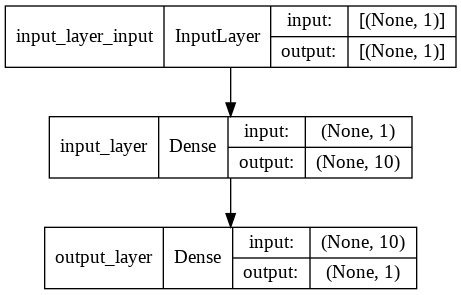

In [36]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

### Visualizing the Model's Predictions

To visualize predictions, it is a good idea to plot them against truth labels.

Often this is seen in the form of `y_test` or `y_true` vs `y_pred` (ground truth value vs the model's predictions).

In [37]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If it feels like you are going to reuse some kind of functionality in the future, it is a good idea to turn it into a function.

In [39]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels = y_test,
                      predictions = y_pred):
   """
   Plot training data, test data and compares predictions to ground truth labels
   """
   plt.figure(figsize=(10, 7))

   # Plot training data in blue
   plt.scatter(train_data, train_labels, c="b", label="Training Data")
   # Plot testing data in green
   plt.scatter(test_data, test_labels, c="g", label="Testing Data")
   # Plot model's predictions in red
   plt.scatter(test_data, predictions, c="r", label = "Predictions")
   # Show legen
   plt.legend();

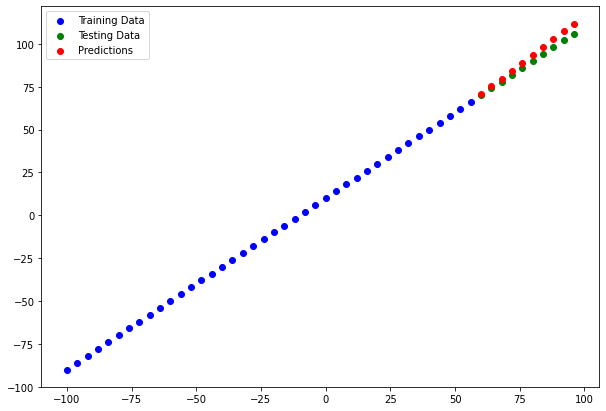

In [40]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_pred)

### Evaluating the Model's Predictions with Regression Evaluation Metrics

Depending on the problem being solved, there will be different evaluation metrics to evaluate the model's performance.

Since this is a regression model, two of the main metrics:
* **MAE** - Mean Absolute Error, "on average, how wrong is each of the model's predictions"; use for any regression problem
>  `tf.keras.losses.MAE()` or `tf.metrics.mean_absolute_error()`

* **MSE** - Mean Square Error, "square the average errors"; use when larger errors are more significant than smaller errors.
> `tf.keras.losses.MSE()` or ` tf.metrics.mean_square_error()`

* **Huber** - combination of MSE and MAE; less sensitive to outliers than MSE
> `tf.keras.losses.Huber()`

In [41]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 159ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [42]:
# Calculate the mean absolute error (MAE)
mae = tf.metrics.mean_absolute_error(y_true = y_test, 
                                     y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

The outputs are different because the shapes are different (10,) and (10,1)

In [43]:
tf.constant(y_pred) 

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [46]:
# Calculate the mean absolute error (MAE)
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

Now the output matches the evaluation of the model from `model.evaluate()`

In [47]:
# Calculate the mean square error (MSE)
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

MSE > MAE, typically

In [48]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  """
  Returns the Mean Absolute Error given 
  the test data set and predictions
  """
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred)).numpy()
  
def mse(y_true, y_pred):
  """
  Returns the Mean Squared Error given 
  the inputs of the test data set and predictions.
  """
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred)).numpy()

# ".numpy()" --> allow for just the value to output rather than the tf.tensor blah blah blah

### Running  Experiments to Improve the Model

```
Build a Model -> Fit It -> Evaluate It -> Tweak It -> Fit It -> Evaluate It...
```

1. Get more data - get more examples for the model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make the model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give the model more of a chance to find patterns in the data.


Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [49]:
# Set random seed
tf.random.set_seed(42)    # for reproducibility

# 1. Create the model
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

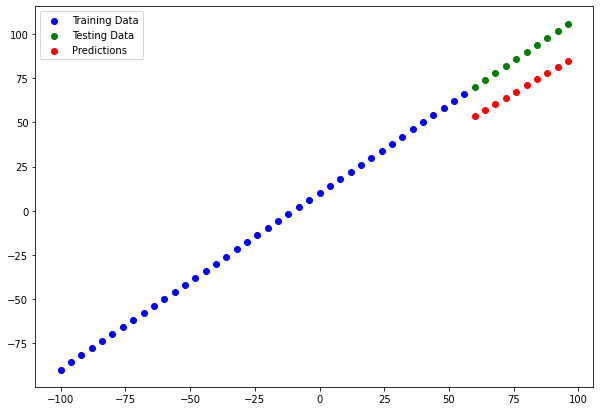

In [50]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [51]:
y_preds_1.shape

(10, 1)

In [52]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(18.745327, 353.57336)

**Build `model_2`

* 2 dense layers, trained for 100 epochs

In [53]:
# Set the random seed
tf.random.set_seed(42)    # for reproducibility

# 1. Create the model (2 dense layers)
model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),           # arbitrary number of 10 hidden units           
          tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [========================

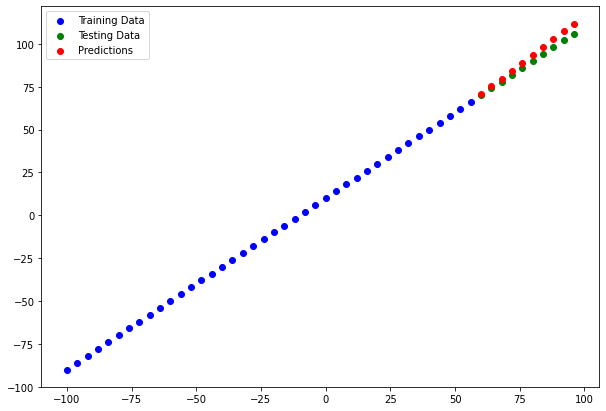

In [54]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [55]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(3.1969407, 13.070143)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [56]:
# Set random seed
tf.random.set_seed(42)   # to allow reproducibility

# 1. Create the model
model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),            # a layer with 10 hidden units  
          tf.keras.layers.Dense(1)                   
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 13ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 9

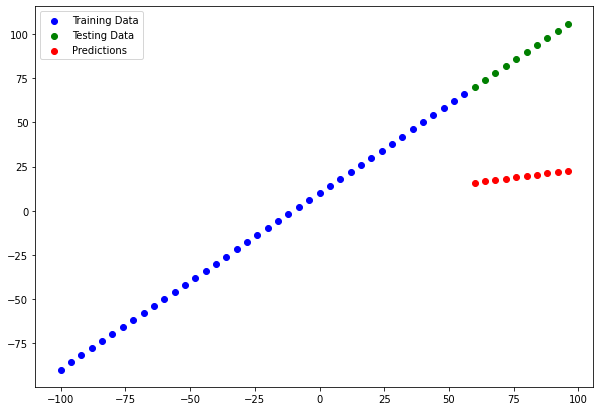

In [57]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

The model trained for TOO LONG!  😆 
This, my friend, is called OVERFITTING. The model is too complex for the data set.

For completness, let's carry on to evaluating the model.

In [58]:
# Calculated model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(68.713615, 4808.0273)

🔑 **Note:** Start with smaller experiments (small models) and make sure they work, then increase their scale, as necessary.

## Comparing the Results of the Experiment Conducted

After running a few experiments, let's compare the results.

In [59]:
# Let's compare the model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1, mse_1],             # compile the models, mae, and mse into a matrix/tensor; 
                ["model_2", mae_2, mse_2],              
                ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])      # compile results in a pandas dataframe
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


Looks like `model_2` performed the best!

In [60]:
# Review model_2's structure
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of the main goals should be to minimize the time between experiments. The more experiment completed, the more things one will figure out which DO NOT work. In return, one gets closer to figuring out what DOES work. 

Remember **Machine Learning Practicioner's Motto: "experiment, experiment, experiment!"**

And... **"If in doubt, run the code!"**

## Tracking Experiments

One really good habit in Machine Learning modelling is to track the results of the experiment.

Also, when doing so, it can be tedious when running several experimental_functions_run_eagerly

Luckily, there are tools to help!


📖 **Resource:** As one builds more models, look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all kinds of Machine Learning experiments (plugs straight into TensorBoard).


## Saving Models

Saving models allows the use of them outside of Google Colab (or wherever the model was trained) such as in a web application or a mobile app.

There are 2 main formats in which models are saved:

1. The `SaveModel` format (the Default)
2. The `HDF5` format

In [61]:
# Save model using SaveModel format
model_2.save("best_model_SavedModel_format")    # Outputs a file

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [62]:
# Save model uing HDF5 format
model_2.save("best_model_HDF5_format.h5")       # Outputs a single file

## Loading in a Saved Model

In [63]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")     # string is the copied path from the folder of the saved model
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Check that the models are the same structure
loaded_SavedModel_format.summary() == model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 3

True

In [65]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [66]:
# Load in the model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Check that the models are the same structure
loaded_h5_model.summary() == model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 3

True

In [68]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

Let's functionize this step for checking loaded saved models with a model of one's choice

In [69]:
def check_loaded_model(model, loaded_model, test_data):
  """
  Checks that the loaded model has the same structure as the model of interest.
  Also, compares the loaded model's predictions with the model of interest.
  """
  # Check that the models are the same structure
  a = loaded_model.summary() == model.summary()

  # Compare model predictions with loaded model predictions
  model_preds = model.predict(test_data)
  loaded_model_preds = loaded_model.predict(test_data)
  
  b = model_2_preds == loaded_h5_model_preds

  print("Model and Loaded Model have the same structure: ", a)
  print("Model and Loaded Model make the same predictions: ", b)

In [70]:
check_loaded_model(model_2, loaded_h5_model, X_test)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 3

## Download a Model (or any other file) from Google Colab

To dowload files from Google Colab:

1. Go to the "Files" tab, right click, then "Download".
2. Use code (see cell below).
3. Save it to Google Drive by connecting to Google Drive and coying it there (see 2nd code cell below).

In [71]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")   # file path can be obtained by right clicking on the Google Colab file, then click "Copy Path"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/ZTM_TensorFlow_Course

In [73]:
# Check within the saved folder for the file
!ls /content/drive/MyDrive/ZTM_TensorFlow_Course

best_model_HDF5_format.h5


## A Larger Example

**Medical Cost Personal Datasets**
> Kaggle Competition:  https://www.kaggle.com/mirichoi0218/insurance

>**Regression Analysis** - a set of statistical processes for estimating the relationship between a dependent variable (aka outcome variable/prediction) and one or more independent variables (aka predictors/features).

In [74]:
# import the requried libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# Read in the insurance data set
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


When there is categorical data (i.e. sex, region), there is a need to create numerical encoding.

**One Hot Encoding on Pandas DataFrame**
> `get_dummies` -> convert categorical variable into dummy/indicator variable; aka one hot encoding

In [76]:
# One-hot encode the DataFrame so that it is all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()           # will output only the top 5 lines

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [77]:
 # Create X and y values (features and labels, respectively)
 X = insurance_one_hot.drop("charges", axis = 1)      # will save all the columns but the "charges" column from the insurance datafram into variable "X"
 y = insurance_one_hot["charges"]                     # save the column "charges" to variable "y"
 X.head(), y.head()                                   # review "X" and "y" dataframes to check

(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [78]:
 # Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,           # test size = 20% of the data; thus training is 80% of data
                                                    random_state=42)         # allow for reproducibility
len(X), len(X_train), len(X_test)                  # Outputs the total quantity of "X" dataframe, then the quantities between the training and test data sets

(1338, 1070, 268)

In [79]:
 # Build a neural nework (sort of like model_2)
 tf.random.set_seed(42)            # allow for reproducibility of randomization

# 1. Create the model
insurance_model = tf.keras.Sequential([
                  tf.keras.layers.Dense(10),    # first layer with 10 hidden variables
                  tf.keras.layers.Dense(1)      # second layer with 1 hidden variable
                   ])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)    # do not reformat into tensors, bc pandas is built on NumPy arrays and knows what to do automatically

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [80]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [81]:
# Review the training dependent variable to see how the mae stacks up against it
y_train.mean(), y_train.median()

(13346.089736364489, 9575.4421)

Right now, it looks like the model is NOT performing well 😞

...Let's try to improve it!

To (try) to improve the model, let's run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as the above model in #1 (`insurance_model_2`), but train for a longer duration (200 epochs)

In [82]:
# Set random seet
tf.random.set_seed(42)    # to allow for reproducibility

# 1. Create the model (3 layers, with 100, 10 and 1 hidden units, respectively)
insurance_model_2 = tf.keras.Sequential([
                    tf.keras.layers.Dense(100),
                    tf.keras.layers.Dense(10),
                    tf.keras.layers.Dense(1)                     
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae']
)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)   # set verbose=0 so the output shown isn't massive           

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [83]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [84]:
# Compare with the first model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [85]:
4924/7023

0.7011248754093692

In [86]:
# Set random seed
tf.random.set_seed(42)     # to allow for reproducibility

# 1. Create the model (same as the above)
insurance_model_3 = tf.keras.Sequential([
                    tf.keras.layers.Dense(100),
                    tf.keras.layers.Dense(10),
                    tf.keras.layers.Dense(1)                    
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [87]:
# Evaluate the third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [88]:
# Review the first model's evaluation metric
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'epochs')

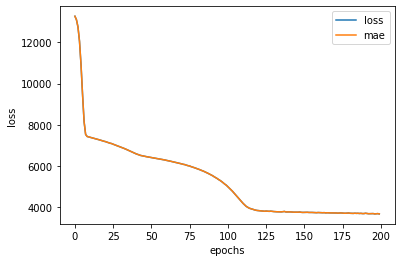

In [89]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Plot helps to visualize how the model is learning and how the loss and mae values decrease as the time duration increases (hopefully!)

>❓ **Question:** How long should you train for? 

It depends. Really...it depends on the problem.

However, this question is often asked. Therefore, TensorFlow has a solution! It is called the `EarlyStopping` callback (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component that  is added to the model to stop training once it stops improving a certain metric.

## Preprocessing Data (Normalization and Standardization)

In terms of scaling values, neural networks tend to prefer normalization. 

📖 **Resource:** https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

> **Feature Scaling**:
>> * Scale (`MinMaxScaler`) - converts all values to between 0 and 1, while preserving the original distribution; use as a default scaler with neural networks
>> * Standardization (`StandardScaler`) - removed the mean and divides each value by the standard deviation; transform a feature to have close to normal distribution (caution: this reduced the effect of outliers)

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare the data, borrow a few classes from Scikit-Learn.

In [91]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# import tensorflow_probability as tfp

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),        # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])   # ignore the columns not identified here for one-hot encoding
)

# Create X and y 
X = insurance.drop("charges", axis=1)     # all columns from insurance dataframe excluding "charges"
y = insurance["charges"]          # "charges" column is the prediction columns

# Build the train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)   # test: 20%, train: 80%

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [92]:
# What does the data look like now?
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [93]:
# Compare how the shapes have changed
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! The data is now normalized and one hot encoded.input_shape
Now let's build a neural network model on it and see how it goes 🤞!

In [94]:
# Build a neural network model to fit on the normalized data

# Set random seed
tf.random.set_seed(42)    # to allow reproducibility

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
                     tf.keras.layers.Dense(100),
                     tf.keras.layers.Dense(10),
                     tf.keras.layers.Dense(1)                   
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model on the normalized data
insurance_model_4.fit(X_train_normal, y_train, epochs =100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [95]:
# Evaluate the insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [96]:
# insurance_model_2 results
# 9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477
# [4924.34765625, 4924.34765625]

In [97]:
insurance_model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               1200      
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


## Boston Housing 

Dataset taken from the StaLib library which is maintained at Carnegie Mellon University.


Sample contains 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the hosues at a location (in k$).

The attributes themsevles are define in the StatLib Website:
>The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 >Variables in order:
 * **CRIM** -     per capita crime rate by town
 * **ZN** -       proportion of residential land zoned for lots over 25,000 sq.ft.
 * **INDUS** -    proportion of non-retail business acres per town
 * **CHAS** -     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 * **NOX** -      nitric oxides concentration (parts per 10 million)
 * **RM** -       average number of rooms per dwelling
 * **AGE** -      proportion of owner-occupied units built prior to 1940
 * **DIS** -      weighted distances to five Boston employment centres
 * **RAD** -      index of accessibility to radial highways
 * **TAX** -      full-value property-tax rate per `$10,000`
 * **PTRATIO** -  pupil-teacher ratio by town
 * **B** -        1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town
 * **LSTAT** -    % lower status of the population
 * **MEDV** -     Median value of owner-occupied homes in $1000's

In [8]:
# import required libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Import data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing.npz', test_split=0.2, seed=42)   # train: 80%, test: 20%; reproducibility

In [12]:
# Check the shape of the imported data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [14]:
X_train[0]

array([9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
       6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
       1.6600e+01, 3.9550e+02, 9.0400e+00])

The dataset is a `numpy` array format and is normalized.

In [17]:
# Build the model
tf.random.set_seed(42)   # allow for reproducibility

# 1. Create the model (5 layers with 200, 20, 150, 100, 1 hidden units, respectively)
model = tf.keras.Sequential([
        tf.keras.layers.Dense(200),
        tf.keras.layers.Dense(200),
        tf.keras.layers.Dense(150),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(1)                     
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

# 3. Fit the model (time duration of 300 epochs)
history = model.fit(X_train, y_train, epochs=300)         

Epoch 1/300
13/13 [==============================] - 1s 5ms/step - loss: 95.6416 - mae: 95.6416
Epoch 2/300
13/13 [==============================] - 0s 5ms/step - loss: 15.5989 - mae: 15.5989
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 8.6769 - mae: 8.6769
Epoch 4/300
13/13 [==============================] - 0s 7ms/step - loss: 7.5622 - mae: 7.5622
Epoch 5/300
13/13 [==============================] - 0s 7ms/step - loss: 7.1922 - mae: 7.1922
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 6.3219 - mae: 6.3219
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 6.7137 - mae: 6.7137
Epoch 8/300
13/13 [==============================] - 0s 6ms/step - loss: 6.3261 - mae: 6.3261
Epoch 9/300
13/13 [==============================] - 0s 6ms/step - loss: 7.6760 - mae: 7.6760
Epoch 10/300
13/13 [==============================] - 0s 7ms/step - loss: 8.2790 - mae: 8.2790
Epoch 11/300
13/13 [==============================] - 0

In [18]:
# Evaluate the model
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 9ms/step - loss: 3.7630 - mae: 3.7630


[3.76304030418396, 3.76304030418396]

Text(0, 0.5, 'epochs')

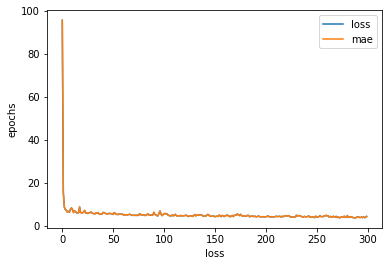

In [19]:
# Plot the loss vs epoch to see the model's learning progress
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")